# Persistent Homology for Market Analysis
Code authored by: Shawhin Talebi

### Import modules

In [1]:
import yfinance as yf
import numpy as np

from ripser import Rips
import persim

import matplotlib.pyplot as plt

# sorry about this
import warnings
warnings.filterwarnings("ignore")

### Get data

In [2]:
# define index names: ^GSPC = S&P 500, ^DJI = DOW Jones, ^IXIC=NASDAQ, ^RUT = Russell 2000
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# define date range
start_date_string = "2018-01-01"
end_date_string = "2022-04-21"

In [3]:
# pull data from yahoo finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

[*********************100%***********************]  4 of 4 completed


In [4]:
# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

### Data prep
Data preparation follows procedure described in: https://arxiv.org/abs/1703.04385

In [5]:
# define array of adjusted closing prices
P = df_close.to_numpy()
# define array of log-returns defined as the log of the ratio between closing values of two subsequent days
r = np.log(np.divide(P[1:],P[:len(P)-1]))

### Persistent homology

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


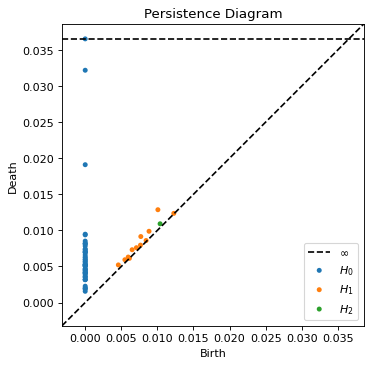

In [6]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

dgm = rips.fit_transform(r[0:50])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram")

plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

In [7]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

# some parameters
w = 20 # time window size
n = len(raw_data)-(2*w)+1 # number of time segments
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persistence diagrams for subsequent time windows
for i in range(n):

    # Compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])
    
    # Compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)
    

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


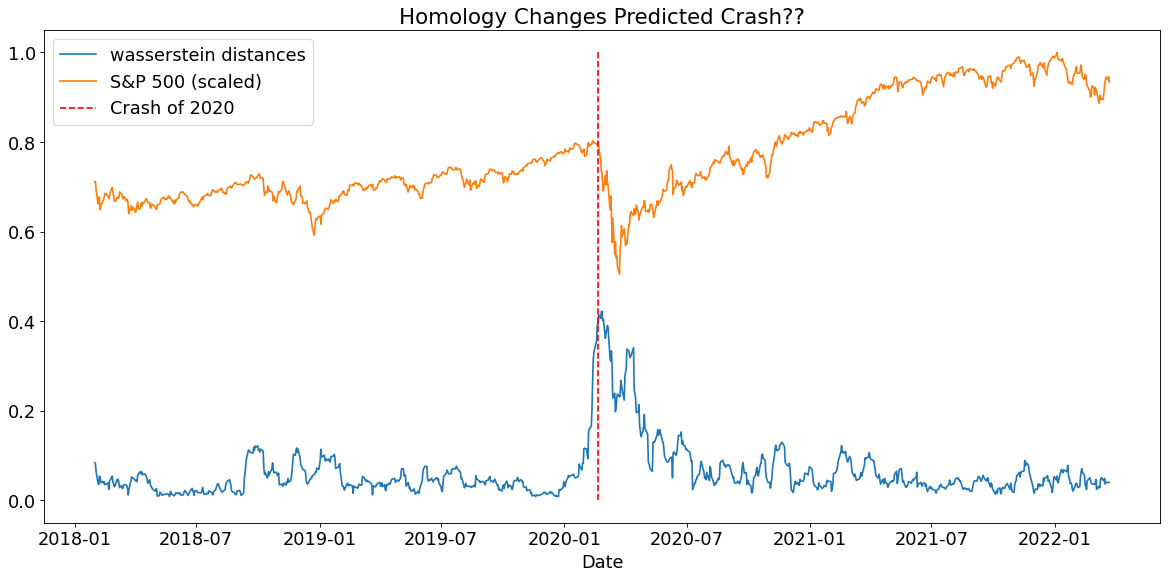

In [8]:
# plot wasserstein distances over time
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[w:n+w],wasserstein_dists)
plt.plot(raw_data.index[w:n+w],df_close.iloc[w:n+w,0]/max(df_close.iloc[w:n+w,0]))
plt.plot([raw_data.index[536], raw_data.index[536]], [0, 1], 'r--')
plt.legend(['wasserstein distances', 'S&P 500 (scaled)', 'Crash of 2020'])
plt.xlabel('Date')
plt.title('Homology Changes Predicted Crash??')

plt.savefig("homology_example_Homology-Changes-Predicted-Crash??.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

In [9]:
!jupyter nbconvert --to script homology_example.ipynb

[NbConvertApp] Converting notebook homology_example.ipynb to script
[NbConvertApp] Writing 3013 bytes to homology_example.py
